In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data=pd.read_csv("spam_text_message_data.csv")
df=data.copy()

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# DATA TEMİZLEME

In [6]:
# male female olarak geçen objeleri 1,0 olarak değiştiriyorum
data.Category = [1 if each== "spam" else 0 for each in data.Category]

#regular expression, NLP
import re
import nltk as nlt


message_list=[]

#gereksiz kısımlarından ayırıp modelin daha iyi çalışmasına yarar sağlaması için mesajları temizledik.
for message in df.Message:
    #regular expression
    message= re.sub("[^a-zA-Z]"," ",message)

    message=message.lower()
    
    #tokenize
    message=nlt.word_tokenize(message)
    
    #Lemmatizer
    lm= nlt.WordNetLemmatizer()

    message=[lm.lemmatize(word) for word in message]
    
    #join
    message=" ".join(message)

    message_list.append(message)
        
   

# MODEL EĞİTİMİ

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

values = np.arange(1,5000,500)

score_list=[]

for max_feature in values:
    
    count_vectorizer=CountVectorizer(max_features=max_feature,stop_words="english")

    sparce_matrix=count_vectorizer.fit_transform(message_list).toarray()

    y=df.iloc[:,0].values
    
    X=sparce_matrix
    
    #train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    #naive_bayes
    nb= GaussianNB()
    
    #training
    nb.fit(X_train,y_train)

    score_list.append(nb.score(X_test,y_test))  


# DATA TEMİZLEME FONKSİYONU

In [8]:
sms_list=[]
def sms(sms):
    #regular expression
    sms= re.sub("[^a-zA-Z]"," ",sms)

    sms=sms.lower()
    
    #tokenize
    message=nlt.word_tokenize(sms)
    
    #Lemmatizer
    lm= nlt.WordNetLemmatizer()

    sms=[lm.lemmatize(word) for word in sms]
    
    #join
    sms=" ".join(sms)

    sms_list.append(sms)
    

    
sms("")
   


# MODEL SKOR GRAFİĞİ

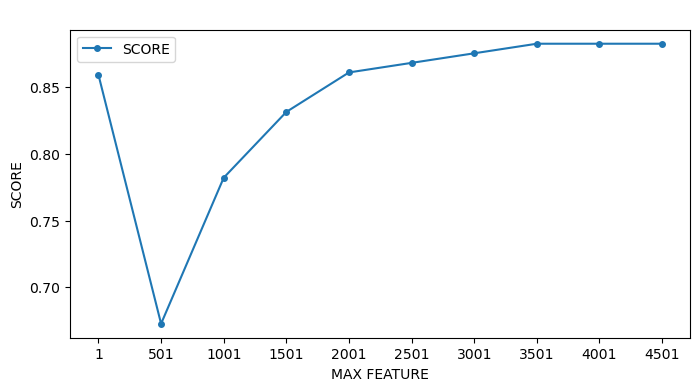

 3501 değerinde en yüksek score: 0.8825112107623319 olarak  elde edildi.


In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,4])
plt.plot(values, score_list, label = 'SCORE', marker='.',markersize=8)
plt.legend()
plt.title(' ')
plt.xlabel('MAX FEATURE')
plt.ylabel('SCORE')
plt.xticks(values);
plt.show();

#values listemdeki max_feature belirlemek için index değerini değişkene atadım bunu en yüksek skoru bastırırken kullanacağım
max_feature_index=score_list.index(np.max(score_list))

print(" {} değerinde en yüksek score: {} olarak  elde edildi.".format(values[max_feature_index],np.max(score_list)))

# MODEL TEST AŞAMASI

In [10]:
#transform

test_message="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive"
#test_message2=sms(" Sorry, I'll call later")

#vectorizer
test_vectorizer=count_vectorizer.transform([test_message]).toarray()

#prediction
pred=nb.predict(test_vectorizer)

#tespit
if pred[0]=="spam":
    print("Bu bir spam mesajdır")
else:
    print("Bu bir spam mesaj değildir")



Bu bir spam mesajdır


In [11]:
#burada gelen mesajlarda en çok kullanılan kelimeleri değişkene atadık
most_frequent_words=count_vectorizer.get_feature_names_out()

#en çok tekrar eden ilk 15 kelime
most_frequent_words[:15]

array(['aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able',
       'absolutly', 'abt', 'abta', 'aburo', 'ac', 'academic', 'acc',
       'accept'], dtype=object)

dataset:https://www.kaggle.com/datasets/team-ai/spam-text-message-classification?rvi=1